In [1]:
import pandas as pd
import numpy as np
import os
import requests

import matplotlib.pyplot as plt
import seaborn as sns
import env
import wrangle as w
import explore as exp
import datetime

In [20]:
df = pd.read_csv('explore_df.csv', index_col=0)
df['crash_datetime'] = pd.to_datetime(df['crash_datetime'])
df['crash_date'] = pd.to_datetime(df['crash_date'])
df['crash_time'] = pd.to_datetime(df['crash_time'], format='%H:%M:%S').dt.time
# Assuming you have a DataFrame named df
df['borough'] = df['borough'].replace('the bronx', 'bronx')
df.head()

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,...,injuries,deaths,time_of_day,hour,day_of_week,month,is_weekend,is_daylight,late_weekend,cluster
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,sedan,passing or lane usage improper,sedan,unsafe lane changing,...,True,False,night,5,Saturday,January,True,False,False,-1
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,sedan,unspecified,station wagon/sport utility vehicle,unspecified,...,False,False,night,1,Saturday,January,True,False,True,-1
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,sedan,unspecified,sedan,unspecified,...,False,False,afternoon,16,Saturday,January,True,True,False,-1
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,station wagon/sport utility vehicle,unspecified,station wagon/sport utility vehicle,unspecified,...,False,False,night,2,Saturday,January,True,False,True,-1
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,sedan,passing too closely,sedan,unspecified,...,False,False,afternoon,17,Saturday,January,True,True,False,-1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48254 entries, 0 to 54203
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_datetime                 48254 non-null  datetime64[ns]
 1   crash_date                     48254 non-null  datetime64[ns]
 2   crash_time                     48254 non-null  object        
 3   collision_id                   48254 non-null  int64         
 4   latitude                       48254 non-null  float64       
 5   longitude                      48254 non-null  float64       
 6   vehicle_type_code1             48254 non-null  object        
 7   contributing_factor_vehicle_1  48254 non-null  object        
 8   vehicle_type_code2             48253 non-null  object        
 9   contributing_factor_vehicle_2  48254 non-null  object        
 10  on_street_name                 48254 non-null  object        
 11  borough             

In [23]:
# Example usage:
info_dataframe = exp.create_info_dataframe(df)  # Assuming data_df is your DataFrame
info_dataframe

,Column,Null_Count,Null_Percentage,Zero_Count,Blank_Count,Unique_Values,Data_Type
0,crash_datetime,0,0.0,0,0,41429,datetime64[ns]
1,crash_date,0,0.0,0,0,365,datetime64[ns]
2,crash_time,0,0.0,0,0,1440,object
3,collision_id,0,0.0,0,0,48254,int64
4,latitude,0,0.0,0,0,23107,float64
5,longitude,0,0.0,0,0,19572,float64
6,vehicle_type_code1,0,0.0,0,0,189,object
7,contributing_factor_vehicle_1,0,0.0,0,0,55,object
8,vehicle_type_code2,1,0.0,0,0,269,object
9,contributing_factor_vehicle_2,0,0.0,0,0,45,object


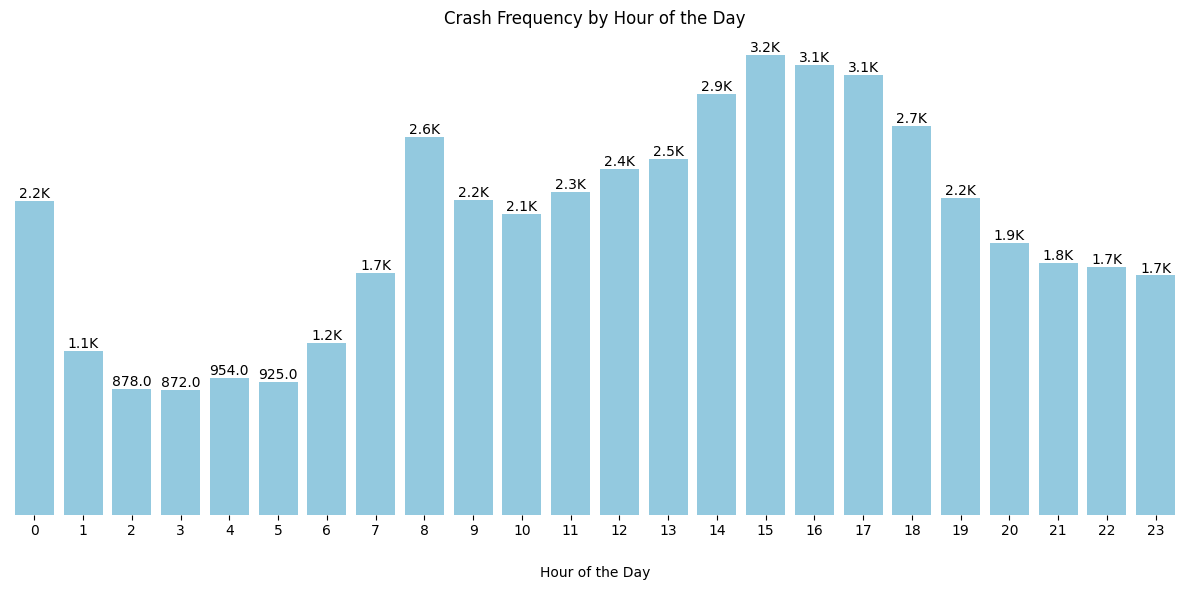

In [5]:
# Function to format numbers for visualization
def format_number(num):
    if num >= 1000000:
        return f'{num/1000000:.1f}M'
    elif num >= 1000:
        return f'{num/1000:.1f}K'
    else:
        return str(num)

# Crash Frequency by Hour of the Day with specified preferences
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x="hour", color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding
ax.set_xlabel("Hour of the Day", labelpad=20)
plt.title("Crash Frequency by Hour of the Day")
plt.tight_layout()

plt.show()


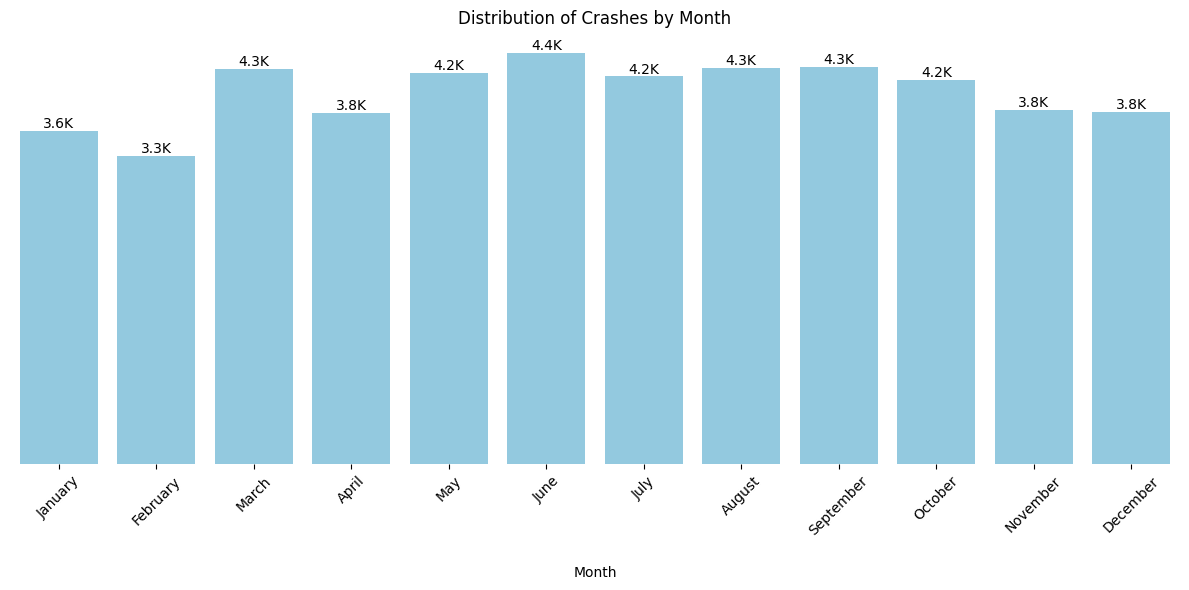

In [6]:
# Grouping by 'month' to get counts of crashes for each month
month_counts = df['month'].value_counts().reset_index()
month_counts.columns = ['month', 'count']
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Plotting crashes by month with specified preferences
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="month", y="count", data=month_counts, order=month_order, color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding and rotation
ax.set_xlabel("Month", labelpad=20)
plt.xticks(rotation=45)
plt.title("Distribution of Crashes by Month")
plt.tight_layout()

plt.show()


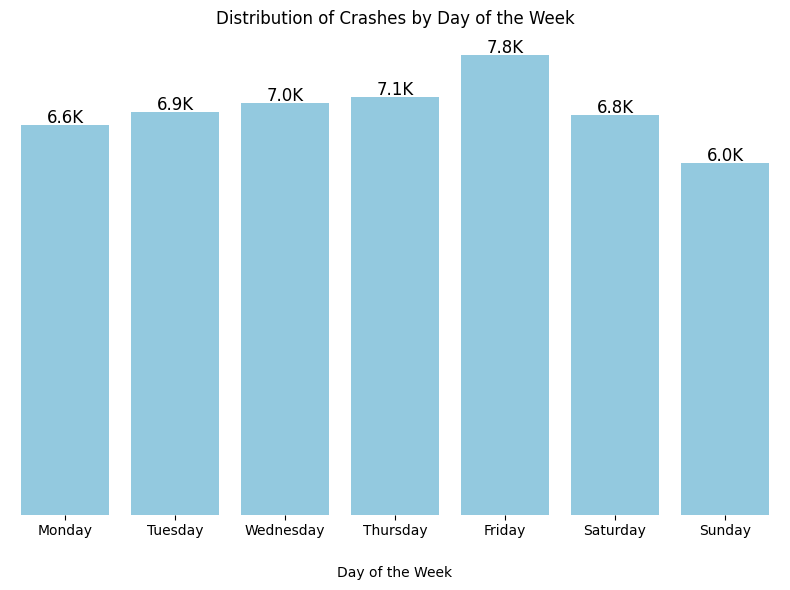

In [7]:
# Distribution of Crashes by Day of the Week with specified preferences
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="day_of_week", order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding
ax.set_xlabel("Day of the Week", labelpad=20)
plt.title("Distribution of Crashes by Day of the Week")
plt.tight_layout()

plt.show()


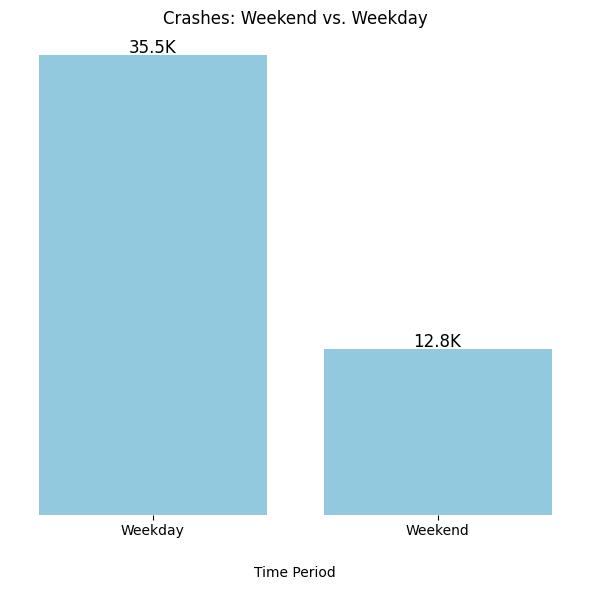

In [8]:
# Grouping by 'is_weekend' to get counts for Weekend vs. Weekday crashes
weekend_counts = df['is_weekend'].value_counts().reset_index()

# Rename the columns to have meaningful names
weekend_counts.columns = ['Time Period', 'Count']

# Replace the boolean values with 'Weekend' and 'Weekday'
weekend_counts['Time Period'] = weekend_counts['Time Period'].replace({True: 'Weekend', False: 'Weekday'})

# Plotting Weekend vs. Weekday crashes with specified preferences
plt.figure(figsize=(6, 6))
ax = sns.barplot(x="Time Period", y="Count", data=weekend_counts, color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding
ax.set_xlabel("Time Period", labelpad=20)
plt.title("Crashes: Weekend vs. Weekday")
plt.tight_layout()

plt.show()


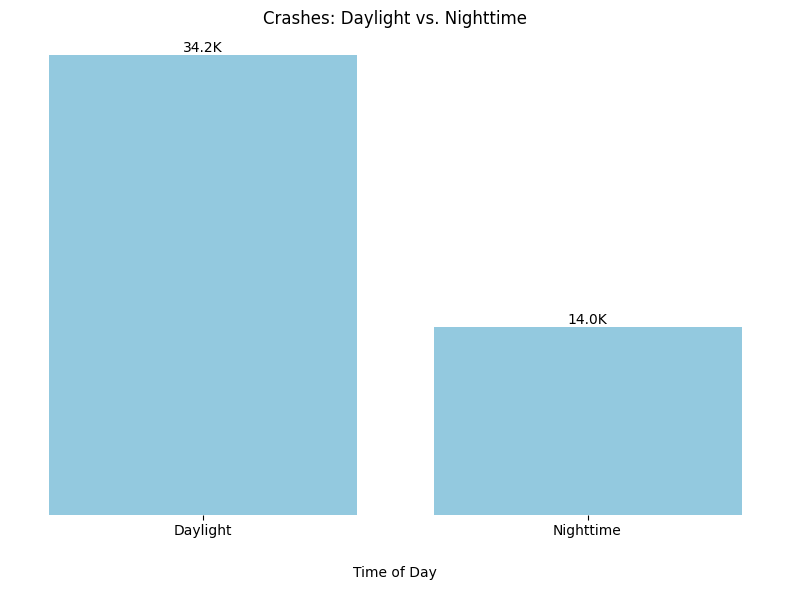

In [9]:
# Grouping by 'is_daylight' to get counts for Daylight vs. Nighttime crashes
daylight_counts = df['is_daylight'].value_counts().reset_index()
daylight_counts['is_daylight'] = daylight_counts['is_daylight'].replace({True: 'Daylight', False: 'Nighttime'})

# Plotting Daylight vs. Nighttime crashes with specified preferences
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="is_daylight", y="count", data=daylight_counts, color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding
ax.set_xlabel("Time of Day", labelpad=20)
plt.title("Crashes: Daylight vs. Nighttime")
plt.tight_layout()

plt.show()


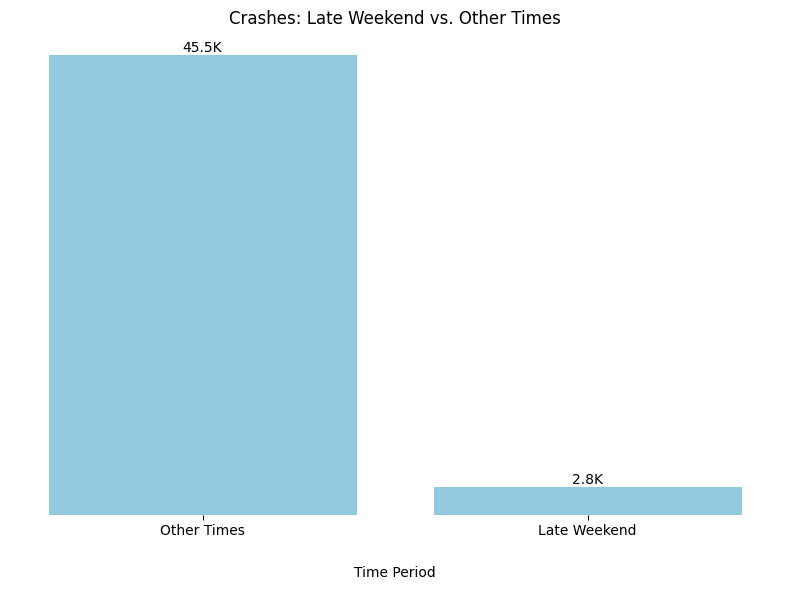

In [10]:
# Grouping by 'late_weekend' to get counts for Late Weekend vs. Other Times crashes
late_weekend_counts = df['late_weekend'].value_counts().reset_index()
late_weekend_counts['late_weekend'] = late_weekend_counts['late_weekend'].replace({True: 'Late Weekend', False: 'Other Times'})

# Plotting Late Weekend vs. Other Times crashes with specified preferences
plt.figure(figsize=(8, 6))
ax = sns.barplot(x="late_weekend", y="count", data=late_weekend_counts, color="skyblue")

# Remove y-axis, grid, and borders
ax.set(yticklabels=[], ylabel='', yticks=[])
sns.despine(left=True, bottom=True)

# Display numbers on top of bars
for p in ax.patches:
    ax.annotate(format_number(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

# Adjust x-axis title padding
ax.set_xlabel("Time Period", labelpad=20)
plt.title("Crashes: Late Weekend vs. Other Times")
plt.tight_layout()

plt.show()


In [ ]:
import folium
from folium.plugins import HeatMap

# assuming df is defined and has the latitude and longitude columns...

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Define gradient
gradient = {0.2: 'blue', 0.4: 'green', 0.6: 'yellow', 0.8: 'orange', 1: 'red'}

# Add the heat map layer to the base map
HeatMap(data=df[['latitude', 'longitude']].dropna().values, radius=8, max_zoom=13, gradient=gradient).add_to(m)

# Display the map
m.save("heatmap.html")


In [64]:
import folium
from folium.plugins import HeatMap

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Add the heat map layer to the base map
HeatMap(data=df[['latitude', 'longitude']].dropna().values, radius=8, max_zoom=13).add_to(m)

# Display the map
m.save("heatmap.html")


In [ ]:
m

In [ ]:
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert decimal degrees to radians for haversine function
df_rad = df[['latitude', 'longitude']].dropna().applymap(radians)

# Function to compute Haversine distance between two points
def haversine_metric(x, y):
    return haversine_distances([x, y])[0][1] * 6371000  # Convert to meters

# Adjusting DBSCAN parameters
epsilon_value_meters = 100  # 100 meters as the radius which might approximate a street corner
min_samples_value = 5
dbscan = DBSCAN(eps=epsilon_value_meters / 6371000, min_samples=min_samples_value, metric=haversine_metric)
clusters = dbscan.fit_predict(df_rad)

# Add cluster labels to the dataframe
df['cluster'] = dbscan.labels_

# Count of data points in each cluster
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Filter to see clusters with data points between 3 and 20
filtered_cluster_counts = cluster_counts[(cluster_counts['Count'] >= 3) & (cluster_counts['Count'] <= 20)]

filtered_cluster_counts.head(10), len(filtered_cluster_counts)


In [34]:
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances
from math import radians

# Convert decimal degrees to radians for haversine function
df_rad = df[['latitude', 'longitude']].dropna().applymap(radians)

# Function to compute Haversine distance between two points
def haversine_metric(x, y):
    return haversine_distances([x, y])[0][1] * 6371000  # Convert to meters

# Adjusting DBSCAN parameters
epsilon_value_meters = 100  # 15 meters as the radius
min_samples_value = 3
dbscan = DBSCAN(eps=epsilon_value_meters / 6371000, min_samples=min_samples_value, metric=haversine_metric)
clusters = dbscan.fit_predict(df_rad)

# Add cluster labels to the dataframe
df['cluster'] = dbscan.labels_

# Count of data points in each cluster
cluster_counts = df['cluster'].value_counts().reset_index()
cluster_counts.columns = ['Cluster', 'Count']

# Filter to see clusters with data points with a minimum of 3
filtered_cluster_counts = cluster_counts[cluster_counts['Count'] >= 3]

print(filtered_cluster_counts.head(10), len(filtered_cluster_counts))


   Cluster  Count
0       -1  36627
1      337     44
2      412     42
3       42     37
4       84     35
5       31     35
6     1209     34
7      544     29
8     1015     27
9      848     27 1530


In [33]:
# Assuming 'df' is your DataFrame
df_copy = df.copy()

In [24]:
filtered_cluster_counts.to_csv('cuslters.csv', index=False)

In [87]:
df.to_csv('df.csv', index=False)

In [39]:
filtered_cluster_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1530 entries, 0 to 1529
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Cluster  1530 non-null   int64
 1   Count    1530 non-null   int64
dtypes: int64(2)
memory usage: 24.0 KB


In [37]:
filtered_cluster_counts.describe()

,Cluster,Count
count,1530.00000,1530.000000
mean,763.50000,31.538562
std,441.81727,936.200952
min,-1.00000,5.000000
25%,381.25000,5.000000
50%,763.50000,6.000000
75%,1145.75000,8.000000
max,1528.00000,36627.000000


In [ ]:
filtered_cluster_counts.describe()

,Cluster,Count
count,1530.00000,1530.000000
mean,763.50000,31.538562
std,441.81727,936.200952
min,-1.00000,5.000000
25%,381.25000,5.000000
50%,763.50000,6.000000
75%,1145.75000,8.000000
max,1528.00000,36627.000000


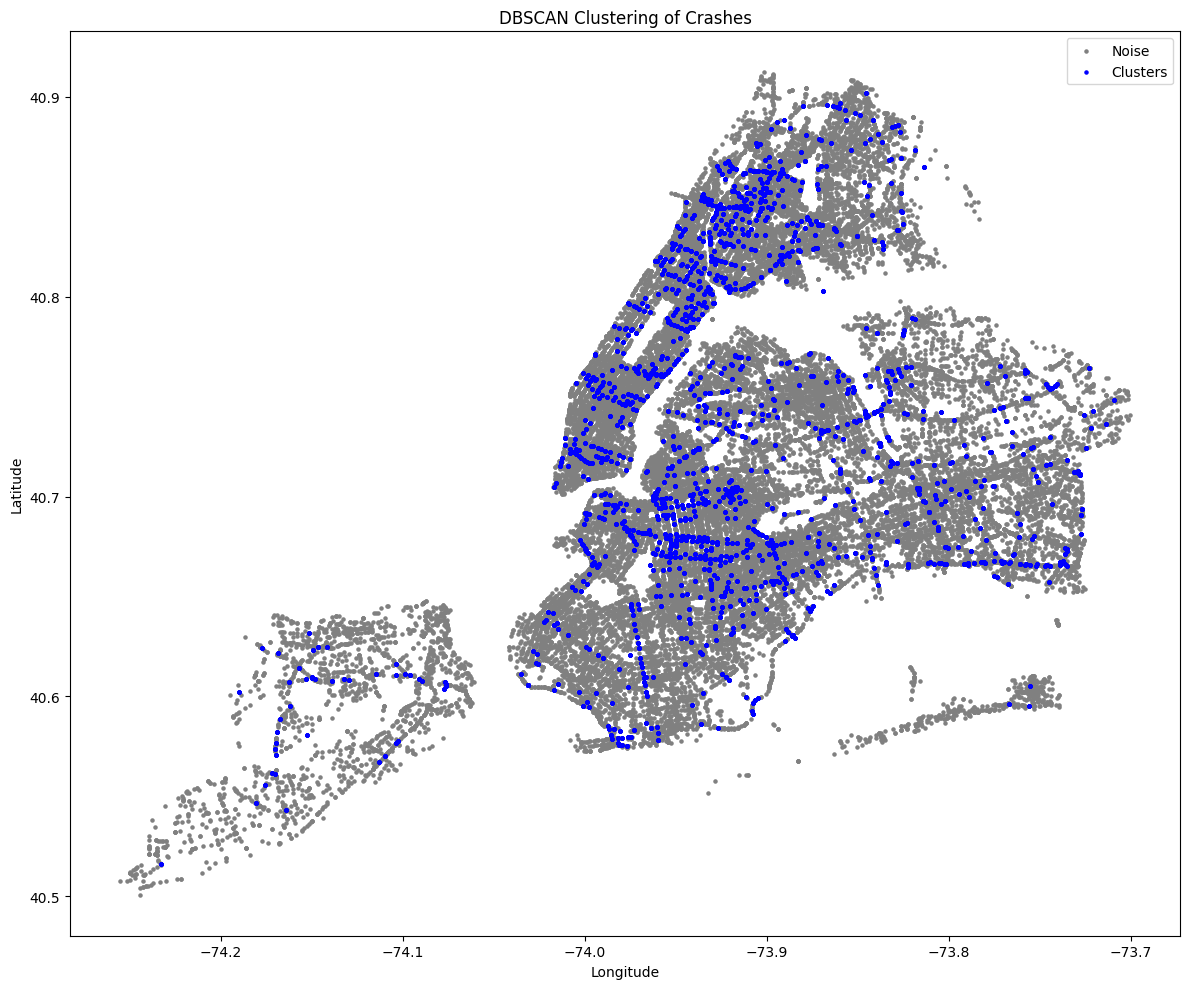

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Plotting noise points (Cluster -1) in a distinct color
noise_mask = df['cluster'] == -1
plt.scatter(df[noise_mask]['longitude'], df[noise_mask]['latitude'], c='gray', s=5, label='Noise')

# Plotting other clusters
clustered_mask = df['cluster'] != -1
plt.scatter(df[clustered_mask]['longitude'], df[clustered_mask]['latitude'], c='blue', s=5, label='Clusters')

plt.title('DBSCAN Clustering of Crashes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.tight_layout()

plt.show()


In [44]:
df.head()

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,...,injuries,deaths,time_of_day,hour,day_of_week,month,is_weekend,is_daylight,late_weekend,cluster
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,sedan,passing or lane usage improper,sedan,unsafe lane changing,...,True,False,night,5,Saturday,January,True,False,False,-1
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,sedan,unspecified,station wagon/sport utility vehicle,unspecified,...,False,False,night,1,Saturday,January,True,False,True,-1
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,sedan,unspecified,sedan,unspecified,...,False,False,afternoon,16,Saturday,January,True,True,False,-1
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,station wagon/sport utility vehicle,unspecified,station wagon/sport utility vehicle,unspecified,...,False,False,night,2,Saturday,January,True,False,True,-1
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,sedan,passing too closely,sedan,unspecified,...,False,False,afternoon,17,Saturday,January,True,True,False,-1


In [28]:
import folium

# Create a base map centered around New York City
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Plotting noise points (Cluster -1) in gray
noise_data = df[df['cluster'] == -1]
for idx, row in noise_data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                        radius=3, 
                        color='gray',
                        fill=True, 
                        fill_opacity=0.6).add_to(m)

# Plotting clustered points in blue
cluster_data = df[df['cluster'] != -1]
for idx, row in cluster_data.iterrows():
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                        radius=3, 
                        color='blue',
                        fill=True, 
                        fill_opacity=0.6).add_to(m)

m.save('clusters_map_2.html')  # This will save an interactive HTML file with the map


In [40]:
import folium
import random

from folium.plugins import MeasureControl

# Function to generate random colors
def random_color():
    r = lambda: random.randint(0, 255)
    return '#%02X%02X%02X' % (r(), r(), r())

# Create a color dictionary for each unique cluster label
colors = {label: random_color() for label in df['cluster'].unique()}

# Create a base map centered around New York City
m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Plot each data point with its cluster's color
for idx, row in df.iterrows():
    color = 'gray' if row['cluster'] == -1 else colors[row['cluster']]
    folium.CircleMarker(location=[row['latitude'], row['longitude']], 
                        radius=3, 
                        color=color,
                        fill=True, 
                        fill_opacity=0.6).add_to(m)
    
    

m.add_child(MeasureControl(primary_length_unit='meters'))

m.save('colored_clusters_map_with_measure2.html')


In [46]:
# Count the number of points in each cluster
cluster_counts = df['cluster'].value_counts()

# Display the top 10 clusters based on count (including the noise cluster)
top_clusters = cluster_counts.head(11)  # We take 11 because we want to include the noise cluster (-1) as well
top_clusters


cluster
-1       36627
 337        44
 412        42
 42         37
 84         35
 31         35
 1209       34
 544        29
 1015       27
 848        27
 465        25
Name: count, dtype: int64

In [47]:
import folium

# Define a function to get color based on cluster label
def get_color(cluster_label):
    # Define a color palette for the clusters
    # Excluding gray (used for the noise cluster)
    palette = [
        '#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231',
        '#911eb4', '#42d4f4', '#f032e6', '#bfef45', '#fabebe'
    ]
    
    if cluster_label == -1:  # Noise cluster
        return 'gray'
    else:
        # Use the cluster label to index into the palette
        # Note: We use modulo to wrap around the palette in case there are more clusters than colors
        return palette[cluster_label % len(palette)]

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each cluster
for cluster_label in top_clusters.index:
    subset = df[df['cluster'] == cluster_label]
    for _, row in subset.iterrows():
        folium.CircleMarker(
            location=(row['latitude'], row['longitude']),
            radius=3,
            color=get_color(cluster_label),
            fill=True,
            fill_color=get_color(cluster_label),
            fill_opacity=0.7
        ).add_to(m)

m.save('clustertop10.html')


In [48]:
# Create a new base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Filter the dataframe to only include rows from the top clusters
filtered_df = df[df['cluster'].isin(top_clusters.index)]

# Plot each point in the filtered dataframe
for _, row in filtered_df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_color(row['cluster']),
        fill=True,
        fill_color=get_color(row['cluster']),
        fill_opacity=0.7
    ).add_to(m)

m.save('clustertop10_v2.html')


In [41]:
# Define the two points in radians
point_A = (radians(40.748817), radians(-73.985428))
point_B = (radians(40.689247), radians(-74.044502))

# Calculate the distance using our haversine_metric function
calculated_distance = haversine_metric(point_A, point_B)
calculated_distance


8286.242884124513

In [42]:
print(df[['latitude', 'longitude']].head())
print(df_rad.head())
import math

# Sample point from df
sample_lat = df['latitude'].iloc[0]
sample_lon = df['longitude'].iloc[0]

# Convert to radians manually
manual_lat_rad = sample_lat * (math.pi / 180)
manual_lon_rad = sample_lon * (math.pi / 180)

print(manual_lat_rad, manual_lon_rad)


    latitude  longitude
0  40.746930  -73.84866
1  40.819157  -73.96038
2  40.806107  -73.91799
3  40.646034  -73.99678
4  40.701195  -73.91409
   latitude  longitude
0  0.711168  -1.288902
1  0.712429  -1.290852
2  0.712201  -1.290112
3  0.709407  -1.291487
4  0.710370  -1.290044
0.7111680885796531 -1.2889022651858355


In [49]:
# Create a new base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Filter the dataframe to only include rows from the cluster 337
cluster_337_df = df[df['cluster'] == 337]

# Plot each point in the filtered dataframe
for _, row in cluster_337_df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_color(337),
        fill=True,
        fill_color=get_color(337),
        fill_opacity=0.7
    ).add_to(m)

m.save('clustertop10_v3.html')


In [77]:
df

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,...,time_of_day,hour,day_of_week,month,is_weekend,is_daylight,late_weekend,cluster,new_cluster,cluster_50
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.84866,sedan,passing or lane usage improper,sedan,unsafe lane changing,...,night,5,Saturday,January,True,False,False,-1,-1,-1
1,2022-01-01 01:30:00,2022-01-01,01:30:00,4491344,40.819157,-73.96038,sedan,unspecified,station wagon/sport utility vehicle,unspecified,...,night,1,Saturday,January,True,False,True,-1,0,-1
2,2022-01-01 16:40:00,2022-01-01,16:40:00,4491478,40.806107,-73.91799,sedan,unspecified,sedan,unspecified,...,afternoon,16,Saturday,January,True,True,False,-1,1,-1
3,2022-01-01 02:53:00,2022-01-01,02:53:00,4491586,40.646034,-73.99678,station wagon/sport utility vehicle,unspecified,station wagon/sport utility vehicle,unspecified,...,night,2,Saturday,January,True,False,True,-1,1849,-1
4,2022-01-01 17:00:00,2022-01-01,17:00:00,4491660,40.701195,-73.91409,sedan,passing too closely,sedan,unspecified,...,afternoon,17,Saturday,January,True,True,False,-1,2,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54198,2022-12-31 19:48:00,2022-12-31,19:48:00,4596147,40.749786,-73.98778,motorscooter,driver inattention/distraction,taxi,unspecified,...,evening,19,Saturday,December,True,True,False,1513,46,-1
54199,2022-12-31 20:45:00,2022-12-31,20:45:00,4596082,40.679680,-73.97826,station wagon/sport utility vehicle,passing or lane usage improper,e-scooter,unspecified,...,evening,20,Saturday,December,True,False,False,-1,-1,-1
54200,2022-12-31 04:00:00,2022-12-31,04:00:00,4595952,40.739925,-73.90454,sedan,unspecified,sedan,unspecified,...,night,4,Saturday,December,True,False,True,-1,-1,-1
54201,2022-12-31 19:00:00,2022-12-31,19:00:00,4596246,40.683132,-73.88259,sedan,failure to yield right-of-way,station wagon/sport utility vehicle,unspecified,...,evening,19,Saturday,December,True,True,False,-1,-1,-1


In [51]:
from sklearn.cluster import DBSCAN

# Extract the latitude and longitude columns
coords = df[['latitude', 'longitude']].values

# Define epsilon based on our discussion
epsilon = 0.00105

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=epsilon, min_samples=5, metric='euclidean')
df['new_cluster'] = dbscan.fit_predict(coords)

# Count the number of points in each new cluster
new_cluster_counts = df['new_cluster'].value_counts()

new_cluster_counts.head(11)  # Display the counts for the top clusters including noise (-1)


new_cluster
-1      12575
 143      416
 115      360
 41       285
 33       279
 241      247
 61       218
 90       213
 185      205
 13       203
 333      173
Name: count, dtype: int64

In [52]:
# Define the top 10 clusters (excluding noise)
top_10_clusters = new_cluster_counts.index[1:11]  # Excludes noise (-1) and includes the next 10

# Filter the dataframe to only include rows from the top 10 clusters and noise
filtered_df = df[df['new_cluster'].isin(top_10_clusters) | (df['new_cluster'] == -1)]

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each point in the filtered dataframe
for _, row in filtered_df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_color(row['new_cluster']),
        fill=True,
        fill_color=get_color(row['new_cluster']),
        fill_opacity=0.7
    ).add_to(m)

m.save('clustertop10_v4.html')


In [53]:
import colorsys

# Generate a distinct color palette
def generate_colors(n):
    hues = [i/n for i in range(n)]
    colors = [colorsys.hsv_to_rgb(h, 0.9, 0.7) for h in hues]
    return ["#{:02x}{:02x}{:02x}".format(int(r*255), int(g*255), int(b*255)) for r, g, b in colors]

# Number of unique clusters excluding noise
num_clusters = df['new_cluster'].nunique() - 1  # -1 to exclude the noise cluster

# Generate colors
cluster_colors = generate_colors(num_clusters)
color_map = {cluster: color for cluster, color in zip(new_cluster_counts.index[1:], cluster_colors)}

# Function to get color based on cluster label
def get_cluster_color(cluster_label):
    if cluster_label == -1:  # Noise cluster
        return 'gray'
    return color_map.get(cluster_label)

# Create a base map
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each point
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_cluster_color(row['new_cluster']),
        fill=True,
        fill_color=get_cluster_color(row['new_cluster']),
        fill_opacity=0.7
    ).add_to(m)

m.save('cluster100m_all.html')


In [72]:
# Define epsilon based on the 50 meter distance
epsilon_50 = 0.000525

# Apply DBSCAN clustering
dbscan_50 = DBSCAN(eps=epsilon_50, min_samples=10, metric='euclidean')
df['cluster_50'] = dbscan_50.fit_predict(coords)

# Count the number of points in each new cluster
cluster_50_counts = df['cluster_50'].value_counts()


In [75]:
cluster_50_counts

cluster_50
-1      40691
 58        58
 129       54
 189       50
 26        48
        ...  
 233       10
 398       10
 265        9
 475        7
 473        5
Name: count, Length: 499, dtype: int64

In [73]:

# Number of unique clusters excluding noise
num_clusters_50 = df['cluster_50'].nunique() - 1  # -1 to exclude the noise cluster

# Generate colors for the new clusters
cluster_50_colors = generate_colors(num_clusters_50)
color_map_50 = {cluster: color for cluster, color in zip(cluster_50_counts.index[1:], cluster_50_colors)}

# Function to get color based on new cluster label
def get_cluster_50_color(cluster_label):
    if cluster_label == -1:  # Noise cluster
        return 'gray'
    return color_map_50.get(cluster_label)

# Create a base map for the new clusters
m_50 = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each point
for _, row in df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_cluster_50_color(row['cluster_50']),
        fill=True,
        fill_color=get_cluster_50_color(row['cluster_50']),
        fill_opacity=0.7
    ).add_to(m_50)

m_50.save('cluster50m_all.html')


In [57]:
# Define the top 10 clusters for the cluster_50 column (excluding noise)
top_10_clusters_50 = cluster_50_counts.index[1:11]  # Excludes noise (-1) and includes the next 10

# Filter the dataframe to only include rows from the top 10 clusters for cluster_50
filtered_df_50 = df[df['cluster_50'].isin(top_10_clusters_50) | (df['cluster_50'] == -1)]

# Create a base map for the top 10 clusters
m_top_10_50 = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each point in the filtered dataframe
for _, row in filtered_df_50.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_cluster_50_color(row['cluster_50']),
        fill=True,
        fill_color=get_cluster_50_color(row['cluster_50']),
        fill_opacity=0.7
    ).add_to(m_top_10_50)

m_top_10_50.save('cluster50m_top10.html')


In [63]:
cluster_50_counts[1:11], len(cluster_50_counts)

(cluster_50
 344    62
 140    58
 539    50
 64     48
 14     46
 225    43
 330    42
 60     41
 160    40
 0      39
 Name: count, dtype: int64,
 2183)

In [62]:
import numpy as np

# Create a new color gradient from red to green for the top 10 clusters
def gradient_color(rank, total_clusters):
    red = [1, 0, 0]
    green = [0, 1, 0]
    color = np.array(red) * (1 - rank/total_clusters) + np.array(green) * (rank/total_clusters)
    return "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

# Map the new gradient colors to the top 10 clusters
color_map_gradient = {cluster: gradient_color(rank, 10) 
                      for rank, cluster in enumerate(top_10_clusters_50)}

# Function to get gradient color based on new cluster label
def get_gradient_color(cluster_label):
    if cluster_label == -1:  # Noise cluster
        return 'gray'
    return color_map_gradient.get(cluster_label)

# Create a base map for the top 10 clusters with gradient colors
m_top_10_gradient = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=10)

# Plot each point in the filtered dataframe
for _, row in filtered_df_50.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_gradient_color(row['cluster_50']),
        fill=True,
        fill_color=get_gradient_color(row['cluster_50']),
        fill_opacity=0.7
    ).add_to(m_top_10_gradient)

m_top_10_gradient.save('cluster50m_top10_v2.html')



In [69]:
# Filter the dataframe to include only rows where 'injuries' is True
injuries_df = df[df['injuries'] == True]

# Extract the latitude and longitude columns for the injuries data
injuries_coords = injuries_df[['latitude', 'longitude']].values

# Apply DBSCAN clustering to the injuries data
injuries_dbscan = DBSCAN(eps=epsilon_50, min_samples=10, metric='euclidean')
injuries_df['cluster_injuries'] = injuries_dbscan.fit_predict(injuries_coords)

# Count the number of points in each new cluster for the injuries data
injuries_cluster_counts = injuries_df['cluster_injuries'].value_counts()

injuries_cluster_counts.head(11)  # Display the counts for the top clusters including noise (-1)


/var/folders/6c/7ht5b3716k32pz2lmh_pzp8m0000gp/T/ipykernel_24214/2146318583.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injuries_df['cluster_injuries'] = injuries_dbscan.fit_predict(injuries_coords)


cluster_injuries
-1     15332
 4        23
 21       21
 1        17
 16       17
 27       17
 0        16
 3        15
 34       15
 25       15
 14       14
Name: count, dtype: int64

In [78]:
injuries_df

,crash_datetime,crash_date,crash_time,collision_id,latitude,longitude,vehicle_type_code1,contributing_factor_vehicle_1,vehicle_type_code2,contributing_factor_vehicle_2,...,hour,day_of_week,month,is_weekend,is_daylight,late_weekend,cluster,new_cluster,cluster_50,cluster_injuries
0,2022-01-01 05:17:00,2022-01-01,05:17:00,4491857,40.746930,-73.848660,sedan,passing or lane usage improper,sedan,unsafe lane changing,...,5,Saturday,January,True,False,False,-1,-1,-1,-1
6,2022-01-01 12:22:00,2022-01-01,12:22:00,4491279,40.666134,-73.884920,sedan,unspecified,sedan,unspecified,...,12,Saturday,January,True,True,False,-1,605,-1,-1
7,2022-01-01 12:21:00,2022-01-01,12:21:00,4491659,40.684937,-73.910140,sedan,driver inattention/distraction,sedan,unspecified,...,12,Saturday,January,True,True,False,1,4,1,-1
20,2022-01-01 16:00:00,2022-01-01,16:00:00,4491386,40.822144,-73.887825,station wagon/sport utility vehicle,unspecified,sedan,unspecified,...,16,Saturday,January,True,True,False,-1,13,4,-1
23,2022-01-01 05:15:00,2022-01-01,05:15:00,4491068,40.665520,-73.744670,station wagon/sport utility vehicle,unspecified,station wagon/sport utility vehicle,unspecified,...,5,Saturday,January,True,False,False,4,16,6,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54196,2022-12-31 15:54:00,2022-12-31,15:54:00,4595582,40.851020,-73.934105,sedan,traffic control disregarded,station wagon/sport utility vehicle,unspecified,...,15,Saturday,December,True,True,False,-1,1438,-1,-1
54198,2022-12-31 19:48:00,2022-12-31,19:48:00,4596147,40.749786,-73.987780,motorscooter,driver inattention/distraction,taxi,unspecified,...,19,Saturday,December,True,True,False,1513,46,1993,-1
54199,2022-12-31 20:45:00,2022-12-31,20:45:00,4596082,40.679680,-73.978260,station wagon/sport utility vehicle,passing or lane usage improper,e-scooter,unspecified,...,20,Saturday,December,True,False,False,-1,-1,-1,-1
54201,2022-12-31 19:00:00,2022-12-31,19:00:00,4596246,40.683132,-73.882590,sedan,failure to yield right-of-way,station wagon/sport utility vehicle,unspecified,...,19,Saturday,December,True,True,False,-1,-1,-1,-1


In [86]:
len(injuries_cluster_counts)

44

In [71]:
# Number of unique clusters excluding noise for injuries data
num_clusters_injuries = injuries_df['cluster_injuries'].nunique() - 1  # -1 to exclude the noise cluster

# Generate colors for the new clusters
cluster_injuries_colors = generate_colors(num_clusters_injuries)
color_map_injuries = {cluster: color for cluster, color in zip(injuries_cluster_counts.index[1:], cluster_injuries_colors)}

# Function to get color based on cluster label for injuries data
def get_injuries_color(cluster_label):
    if cluster_label == -1:  # Noise cluster
        return 'gray'
    return color_map_injuries.get(cluster_label)

# Create a base map for the clusters of injuries data
m_injuries = folium.Map(location=[injuries_df['latitude'].mean(), injuries_df['longitude'].mean()], zoom_start=10)

# Plot each point in the injuries dataframe
for _, row in injuries_df.iterrows():
    folium.CircleMarker(
        location=(row['latitude'], row['longitude']),
        radius=3,
        color=get_injuries_color(row['cluster_injuries']),
        fill=True,
        fill_color=get_injuries_color(row['cluster_injuries']),
        fill_opacity=0.7
    ).add_to(m_injuries)

m_injuries.save('cluster_inj.html')


In [80]:
# Integrate the clustering results into the main dataframe
df['cluster_injuries'] = -1  # Default to noise
df.loc[injuries_df.index, 'cluster_injuries'] = injuries_df['cluster_injuries']

# Check the distribution of the 'cluster_50_injuries' column in the main dataframe
cluster_50_injuries_counts = df['cluster_injuries'].value_counts()
cluster_50_injuries_counts.head(11)  # Display the counts for the top clusters including noise (-1)


cluster_injuries
-1     47708
 4        23
 21       21
 1        17
 16       17
 27       17
 0        16
 3        15
 34       15
 25       15
 14       14
Name: count, dtype: int64

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48254 entries, 0 to 54203
Data columns (total 26 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   crash_datetime                 48254 non-null  datetime64[ns]
 1   crash_date                     48254 non-null  datetime64[ns]
 2   crash_time                     48254 non-null  object        
 3   collision_id                   48254 non-null  int64         
 4   latitude                       48254 non-null  float64       
 5   longitude                      48254 non-null  float64       
 6   vehicle_type_code1             48254 non-null  object        
 7   contributing_factor_vehicle_1  48254 non-null  object        
 8   vehicle_type_code2             48253 non-null  object        
 9   contributing_factor_vehicle_2  48254 non-null  object        
 10  on_street_name                 48254 non-null  object        
 11  borough             

In [89]:
df.columns

Index(['crash_datetime', 'crash_date', 'crash_time', 'collision_id',
       'latitude', 'longitude', 'vehicle_type_code1',
       'contributing_factor_vehicle_1', 'vehicle_type_code2',
       'contributing_factor_vehicle_2', 'on_street_name', 'borough',
       'zip_code', 'injuries_count', 'deaths_count', 'injuries', 'deaths',
       'time_of_day', 'hour', 'day_of_week', 'month', 'is_weekend',
       'is_daylight', 'late_weekend', 'cluster_crash', 'cluster_injuries'],
      dtype='object')

In [82]:
df = df.drop(columns=['cluster', 'new_cluster', 'cluster_50_injuries'])

In [84]:
df.rename(columns={'cluster_50': 'cluster_crash'}, inplace=True)